# DS4023 Assignment 3: SVM and Ensemble Learning(45 pts)

### Q1: Soft-margin SVM (9 pts)

You are given a dataset (svm_soft.mat) containing 2D points ['X'] from two classes with corresponding label (0 or 1) in column ['y']. Please visualize the datapoints and classify them using linear SVM with soft margin. You may assume that the penalty term $C$ is set to 1 in $min_{w,b} \frac{1}{2} ||w||^2+ C\sum_i \epsilon_i$.

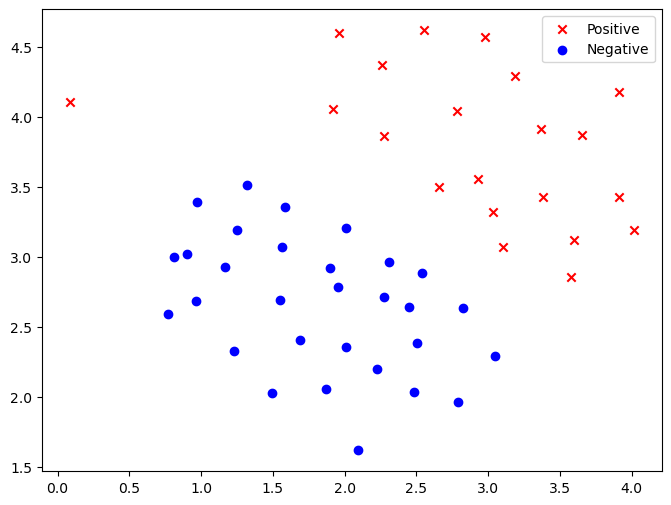

In [1]:
""" 
Part 1: Visualize the datapoints. Your plot should look similar to the sample one.
"""

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


def plot_svm_soft(boundary=False, svc=None):
    raw_data = loadmat('data/svm_soft.mat')

    data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
    data['y'] = raw_data['y']

    pos = data['y'] == 1
    neg = data['y'] == 0

    plt.figure(figsize=(8, 6))
    plt.scatter(data.loc[pos, 'X1'], data.loc[pos, 'X2'],
                marker='x', color='red',   label='Positive')
    plt.scatter(data.loc[neg, 'X1'], data.loc[neg, 'X2'],
                marker='o', color='blue',  label='Negative')

    if boundary:
        X = data[['X1', 'X2']].values
        y = data['y'].values

        x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
        y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, 300),
            np.linspace(y_min, y_max, 300)
        )

        Z = svc.decision_function(
            np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.contour(xx, yy, Z, levels=[0],
                    linestyles=['-'], colors='lightblue')

    plt.legend()
    plt.show()


plot_svm_soft()

![sample image for data visualization](./plot.png)

Coefficients (w): [0.59153686 0.81825054]
Intercept (b): -4.11954105475478


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


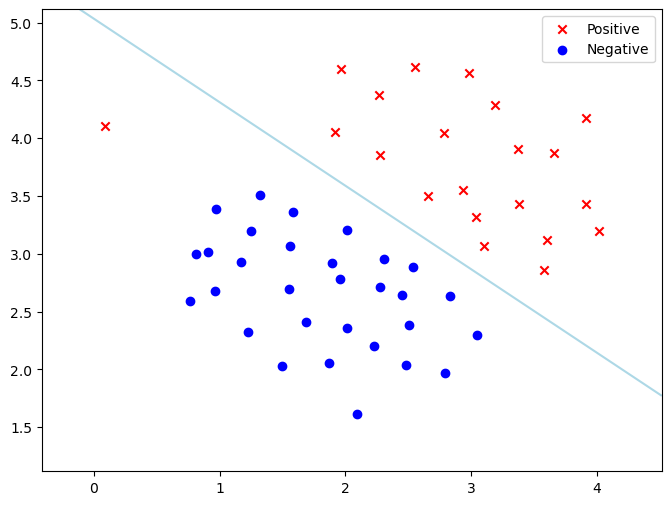

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [2]:
""" 
Part 2: Classify the datapoints and visualize the decision boundary. 
        You should print out the coefficients and the interception for the linear classifier. 
        Your plot should look like the sample one.
"""
from sklearn import svm
import numpy as np


def classify_svm_soft():
    raw_data = loadmat('data/svm_soft.mat')
    data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
    data['y'] = raw_data['y']

    svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1_000_000)
    svc.fit(data[['X1', 'X2']], data['y'])

    print('Coefficients (w):', svc.coef_[0])
    print('Intercept (b):', svc.intercept_[0])

    plot_svm_soft(boundary=True, svc=svc)

    return svc


classify_svm_soft()

![sample image for data visualization](./plot2.png)

### Q2: Kernel SVM (9 pts)

You are given a dataset (svm_kernel.mat) containing 2D points ['X'] from two classes with corresponding label (0 or 1) in column ['y']. Please visualize the datapoints and classify them using linear SVM with Gaussian kernel. 

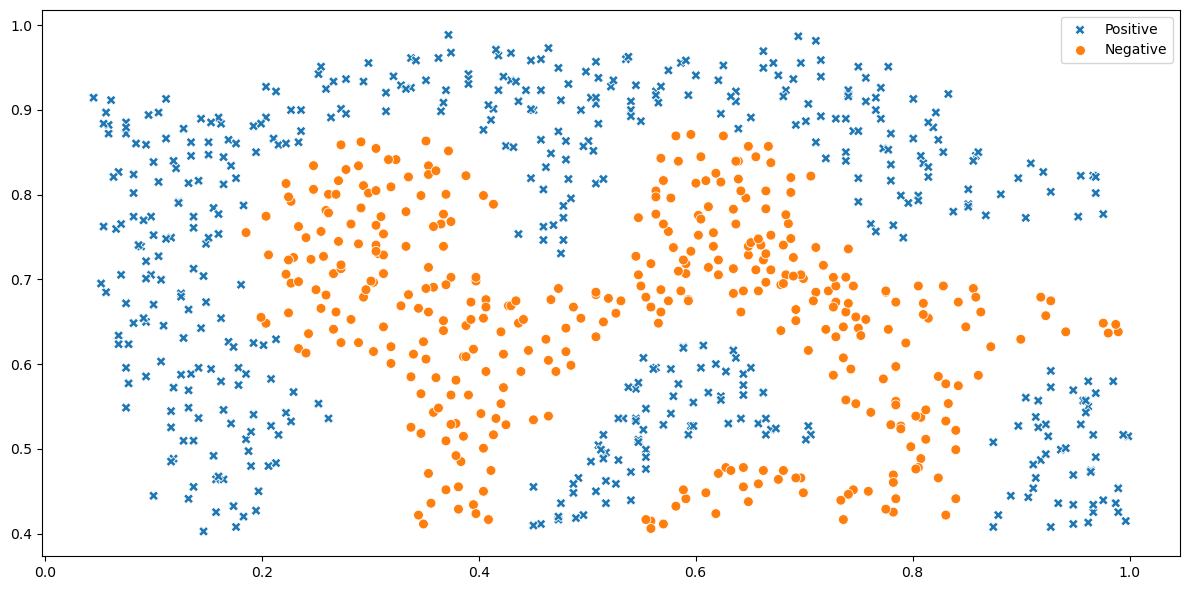

In [8]:
""" 
Part 1: Visualize the datapoints. Your plot should look similar to the sample one.
"""

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sb

def plot_svm_kernel():
    global data_svm_kernel
    
    data_svm_kernel = loadmat('data/svm_kernel.mat')
    X2 = data_svm_kernel['X']
    y2 = data_svm_kernel['y'].ravel()

    data = pd.DataFrame(data_svm_kernel['X'], columns=['X1', 'X2'])
    data['y'] = data_svm_kernel['y']

    plt.figure(figsize=(12, 6))
    sb.scatterplot(
        data=data,
        x='X1', y='X2',
        hue='y',
        style='y',
        palette={1: '#1f77b4', 0: '#ff7f0e'},
        markers={1: 'X', 0: 'o'},
        s=50,
    )
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(labels=['Positive', 'Negative'])
    plt.tight_layout()
    plt.show()


plot_svm_kernel()

![sample image for data visualization](./plot3.png)

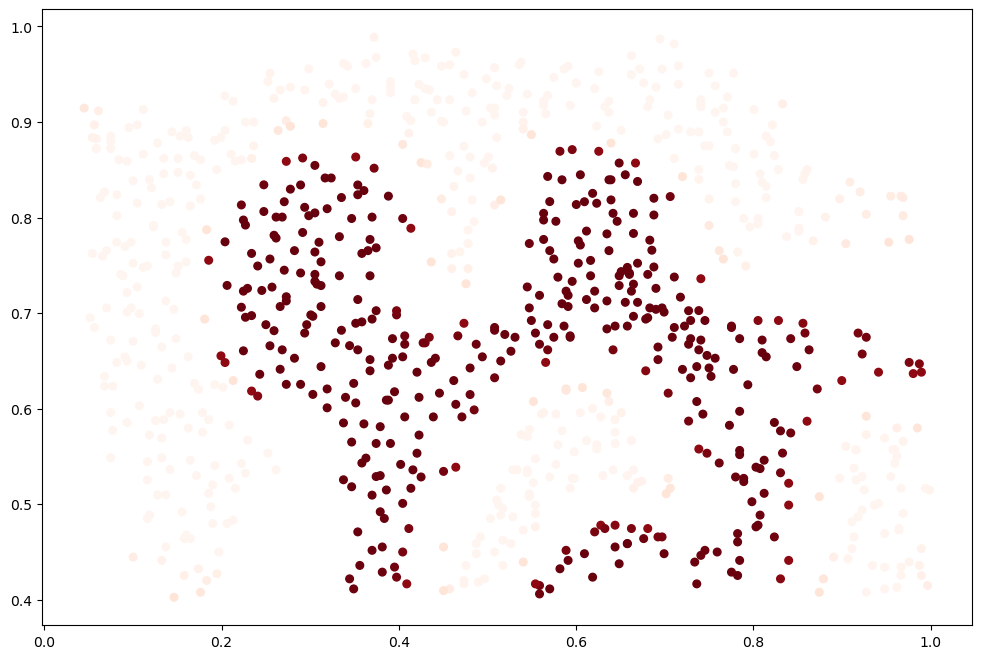

In [6]:
"""
Part 2. Classify the data points using Gaussian kernel. 
        Visualize the probabilities of the classification results.
        If your classification is correct, your plot should look similar to the sample one.
"""


def classify_svm_kernel():
    global data_svm_kernel
    data = loadmat('data/svm_kernel.mat')
    X = data['X']
    y = data['y'].flatten()
    data_svm_kernel = {
        'X1': X[:, 0],
        'X2': X[:, 1]
    }
    svc = svm.SVC(kernel='rbf', C=1000, gamma=100, probability=True)
    svc.fit(X, y)
    probabilities = svc.predict_proba(X)[:, 0]
    return probabilities


probabilities = classify_svm_kernel()

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data_svm_kernel['X1'], data_svm_kernel['X2'],
           s=30, c=probabilities, cmap='Reds')
plt.show()

![sample image for data visualization](./plot4.png)

### Q3: SVM in Email Spam Detection (9 pts)

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. Please write an SVM classifier to detect spam emails. There are two data files that you need to load, one for training, i.e., "email_train.mat", and the other for testing, i.e., "email_test.mat". Your model should train on the training dataset and be applied to the test dataset to obtain the spam detection accuracy. **Your classifier should have an accuracy higher than 90% in both training and testing. Otherwise, every 10% of accuracy decrease leads to a 2 pts deduction in marks. For example, an accuracy of [80%, 90%) will get deducted for 2 pts overall, and [70%, 80%) will get deducted for 4 pts.**

In [ ]:
from scipy.io import loadmat


def spam_detector_svm():
    train_data = loadmat('data/email_train.mat')
    X = train_data['X']
    y = train_data['y'].flatten()

    test_data = loadmat('data/email_test.mat')
    Xtest = test_data['Xtest']
    ytest = test_data['ytest'].flatten()

    svc = svm.SVC(kernel='rbf', C=1000, gamma='scale')
    svc.fit(X, y)

    # Do not remove.
    print('Training accuracy = {0}%'.format(
        np.round(svc.score(X, y) * 100, 2)))
    print('Test accuracy = {0}%'.format(
        np.round(svc.score(Xtest, ytest) * 100, 2)))


spam_detector_svm()

Training accuracy = 100.0%
Test accuracy = 98.0%


### Q4: Bagging (9 pts)

You are given a tumor dataset `tumor.csv`. The dataset contains instances with 9 features. Each instance is labeled in either benign or malignant classes (0 for benign, 1 for malignant in last column). The dataset only contains numeric values and has been normalized. Use ``RandomForestClassifier`` to calculate the mean accuracy by using 8-folds cross-validation. Number of trees set to 50.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


def classify_bagging():
    rand_seed = 50  # Do not change

    df = pd.read_csv('data/tumor.csv')

    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    rf = RandomForestClassifier(n_estimators=50, random_state=rand_seed)
    results = model_selection.cross_val_score(rf, X, y, cv=8)

    # Do not remove.
    print("Performance of random forest:%f" % (results.mean()))


classify_bagging()

Performance of random forest:0.965713


### Q5: AdaBoost (9 pts)

Use AdaBoostClassifier to classify the same dataset `tumor.csv`. Compute the mean accuracy by using 8-folds cross-validation and 50 estimators.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


def classify_adaboost():
    rand_seed = 50  # Do not change

    df = pd.read_csv('data/tumor.csv')
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    ada = AdaBoostClassifier(n_estimators=50, random_state=rand_seed)
    cv = StratifiedKFold(n_splits=8, shuffle=True, random_state=rand_seed)
    results = cross_val_score(
        ada, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

    # Do not remove.
    print("Performance of adaboost:%f" % (results.mean()))


classify_adaboost()

Performance of adaboost:0.954219
